In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter
import scipy.stats as stats

In [2]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.600,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300.0,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,282.089,8.3,17876,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181.0,en,['Marvel Studios'],['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,111.199,7.5,23230,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162.0,en,"['Dune Entertainment', 'Lightstorm Entertainme...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,90.133,7.9,19032,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194.0,en,"['Paramount', 'Lightstorm Entertainment', '20t...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,58.173,7.4,15704,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136.0,en,"['Lucasfilm Ltd.', 'Bad Robot']",['US'],['en']


# Dropping invalid Data

In [3]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



## Calculate and Insert Profit Variable

In [4]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [5]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [6]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

## EXPLORATORY ANALYSIS

## Numeric Data

In [7]:
Q1 = np.quantile(Movie_CleanedData.VoteCount, 0.25)
mean = Movie_CleanedData.VoteCount.mean()
mean_Avg = Movie_CleanedData.VoteAvg.mean()

for i in range(len(Movie_CleanedData)):
    if Movie_CleanedData.VoteCount[i]<Q1:
        Movie_CleanedData.at[i,'VoteCount'] = mean
        Movie_CleanedData.at[i,'VoteAvg']= mean_Avg

<AxesSubplot:title={'center':'Profit vs VoteCount'}, xlabel='VoteCount', ylabel='Profit'>

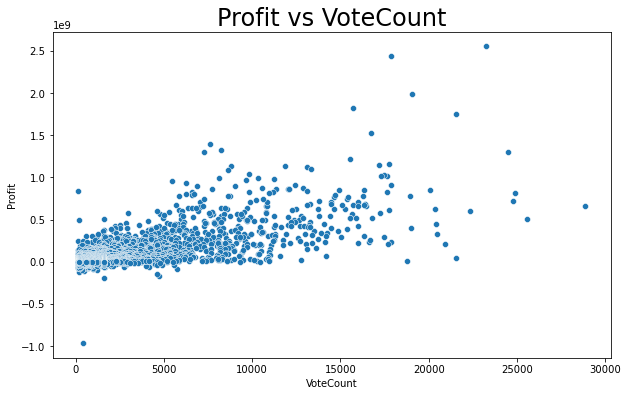

In [8]:
#Plotting VoteCount versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteCount", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteCount", y="Profit")

<AxesSubplot:title={'center':'Profit vs VoteAvg'}, xlabel='VoteAvg', ylabel='Profit'>

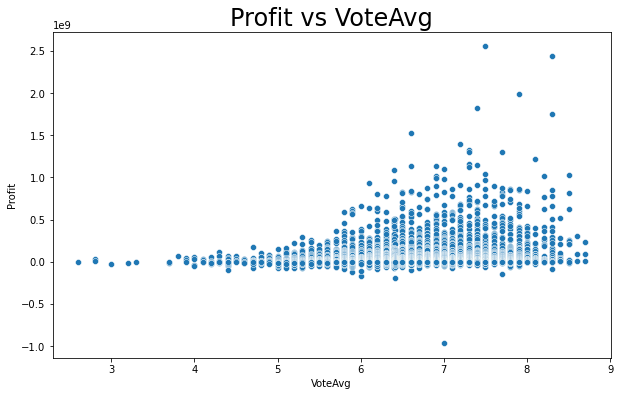

In [9]:
#Plotting VoteAvg versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteAvg", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteAvg", y="Profit")

In [10]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
0,356000000,282.089,8.3,17876,2797800564,2441800564,181.0,2019,4
1,237000000,111.199,7.5,23230,2787965087,2550965087,162.0,2009,12
2,200000000,90.133,7.9,19032,2187463944,1987463944,194.0,1997,11
3,245000000,58.173,7.4,15704,2068223624,1823223624,136.0,2015,12
4,300000000,320.103,8.3,21555,2046239637,1746239637,149.0,2018,4


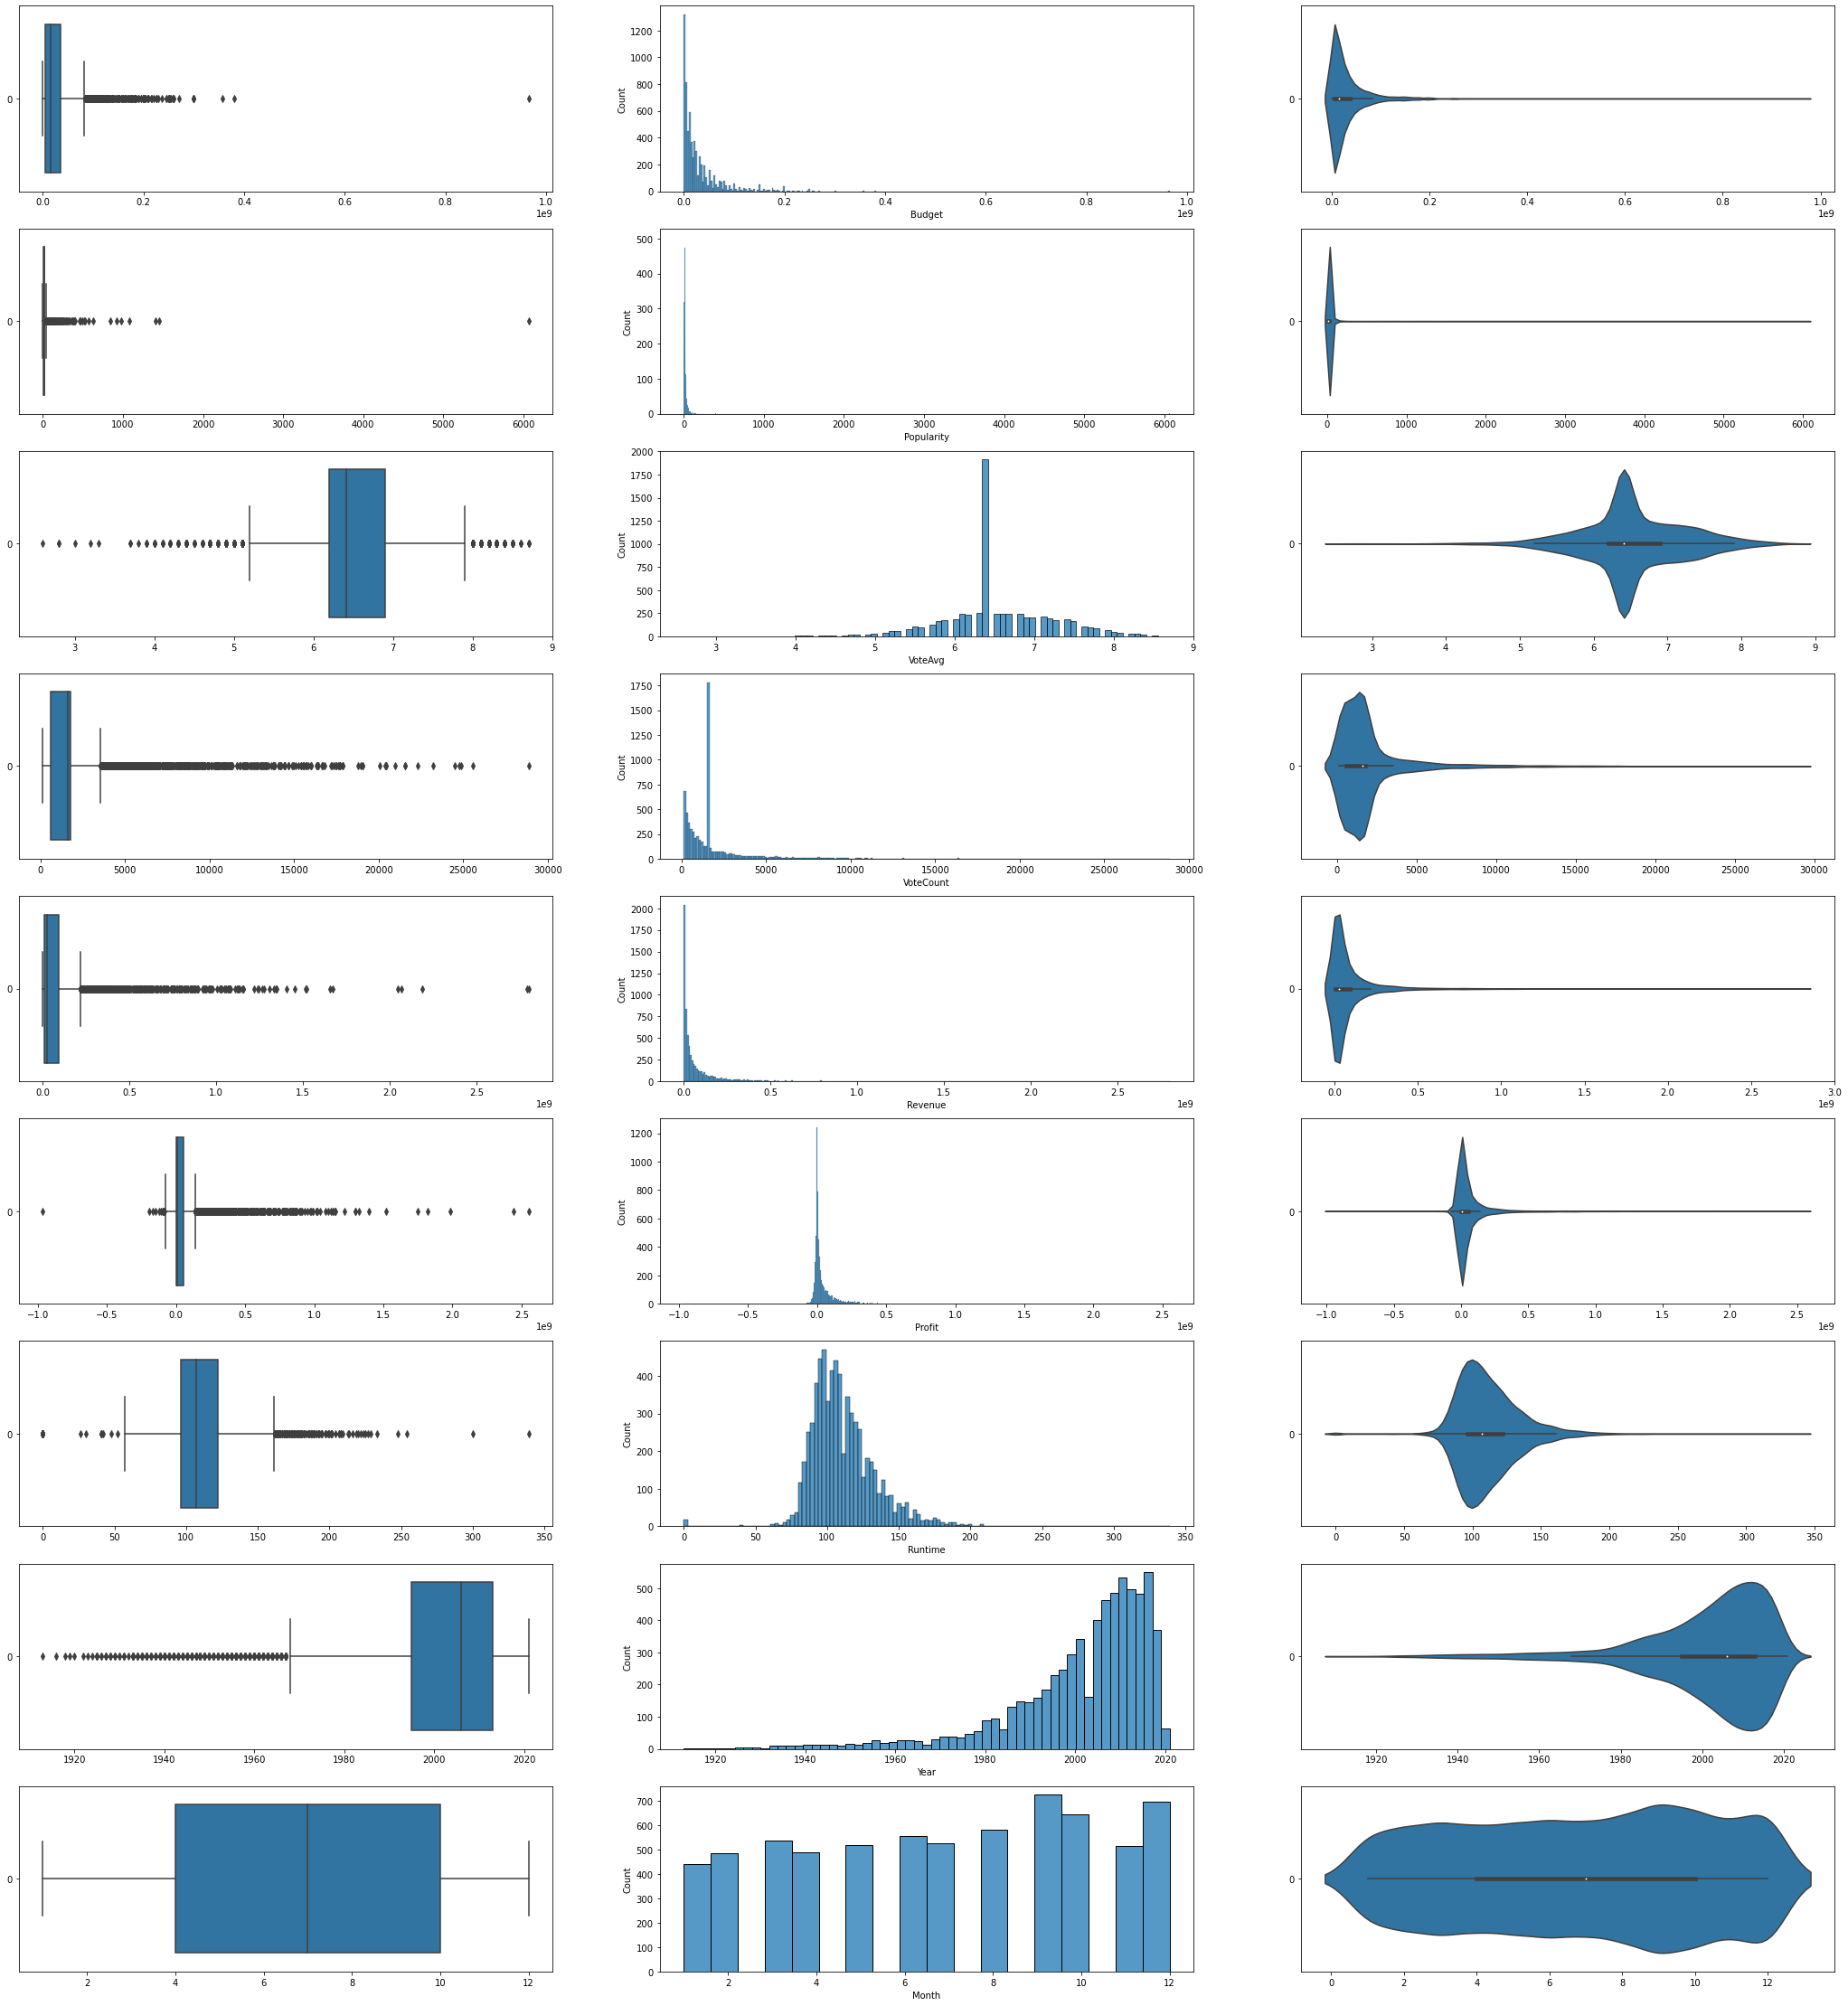

In [11]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.196472 -0.002433   0.516447  0.708789  0.551146   
Popularity  0.196472    1.000000  0.084817   0.161098  0.181020  0.157684   
VoteAvg    -0.002433    0.084817  1.000000   0.371584  0.187677  0.222693   
VoteCount   0.516447    0.161098  0.371584   1.000000  0.739157  0.725966   
Revenue     0.708789    0.181020  0.187677   0.739157  1.000000  0.979255   
Profit      0.551146    0.157684  0.222693   0.725966  0.979255  1.000000   
Runtime     0.135163    0.013692  0.292102   0.180166  0.154626  0.144074   
Year        0.219788    0.092380 -0.147883   0.137734  0.151690  0.116294   
Month       0.032337   -0.004569  0.106118   0.027228  0.032491  0.029143   

             Runtime      Year     Month  
Budget      0.135163  0.219788  0.032337  
Popularity  0.013692  0.092380 -0.004569  
VoteAvg     0.292102 -0.147883  0.106118  
VoteCount   0.180166  0.137734  0.027228  
Revenue     0.

<AxesSubplot:>

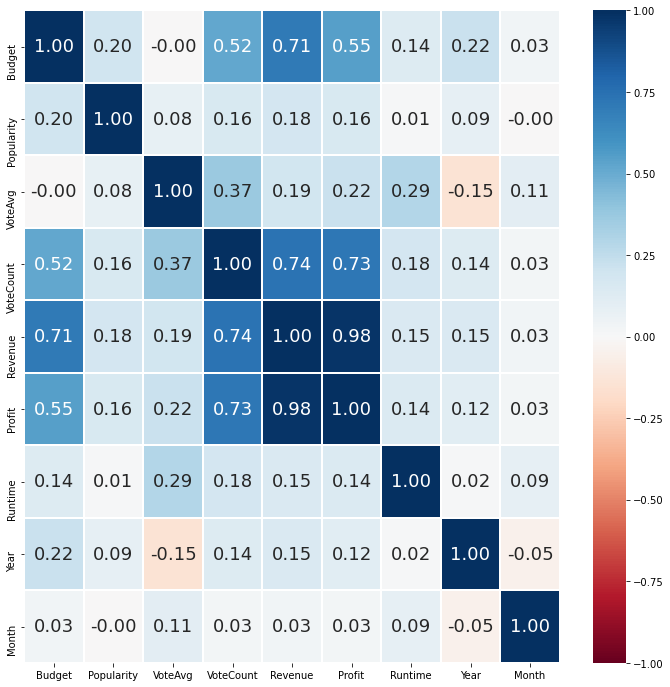

In [12]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

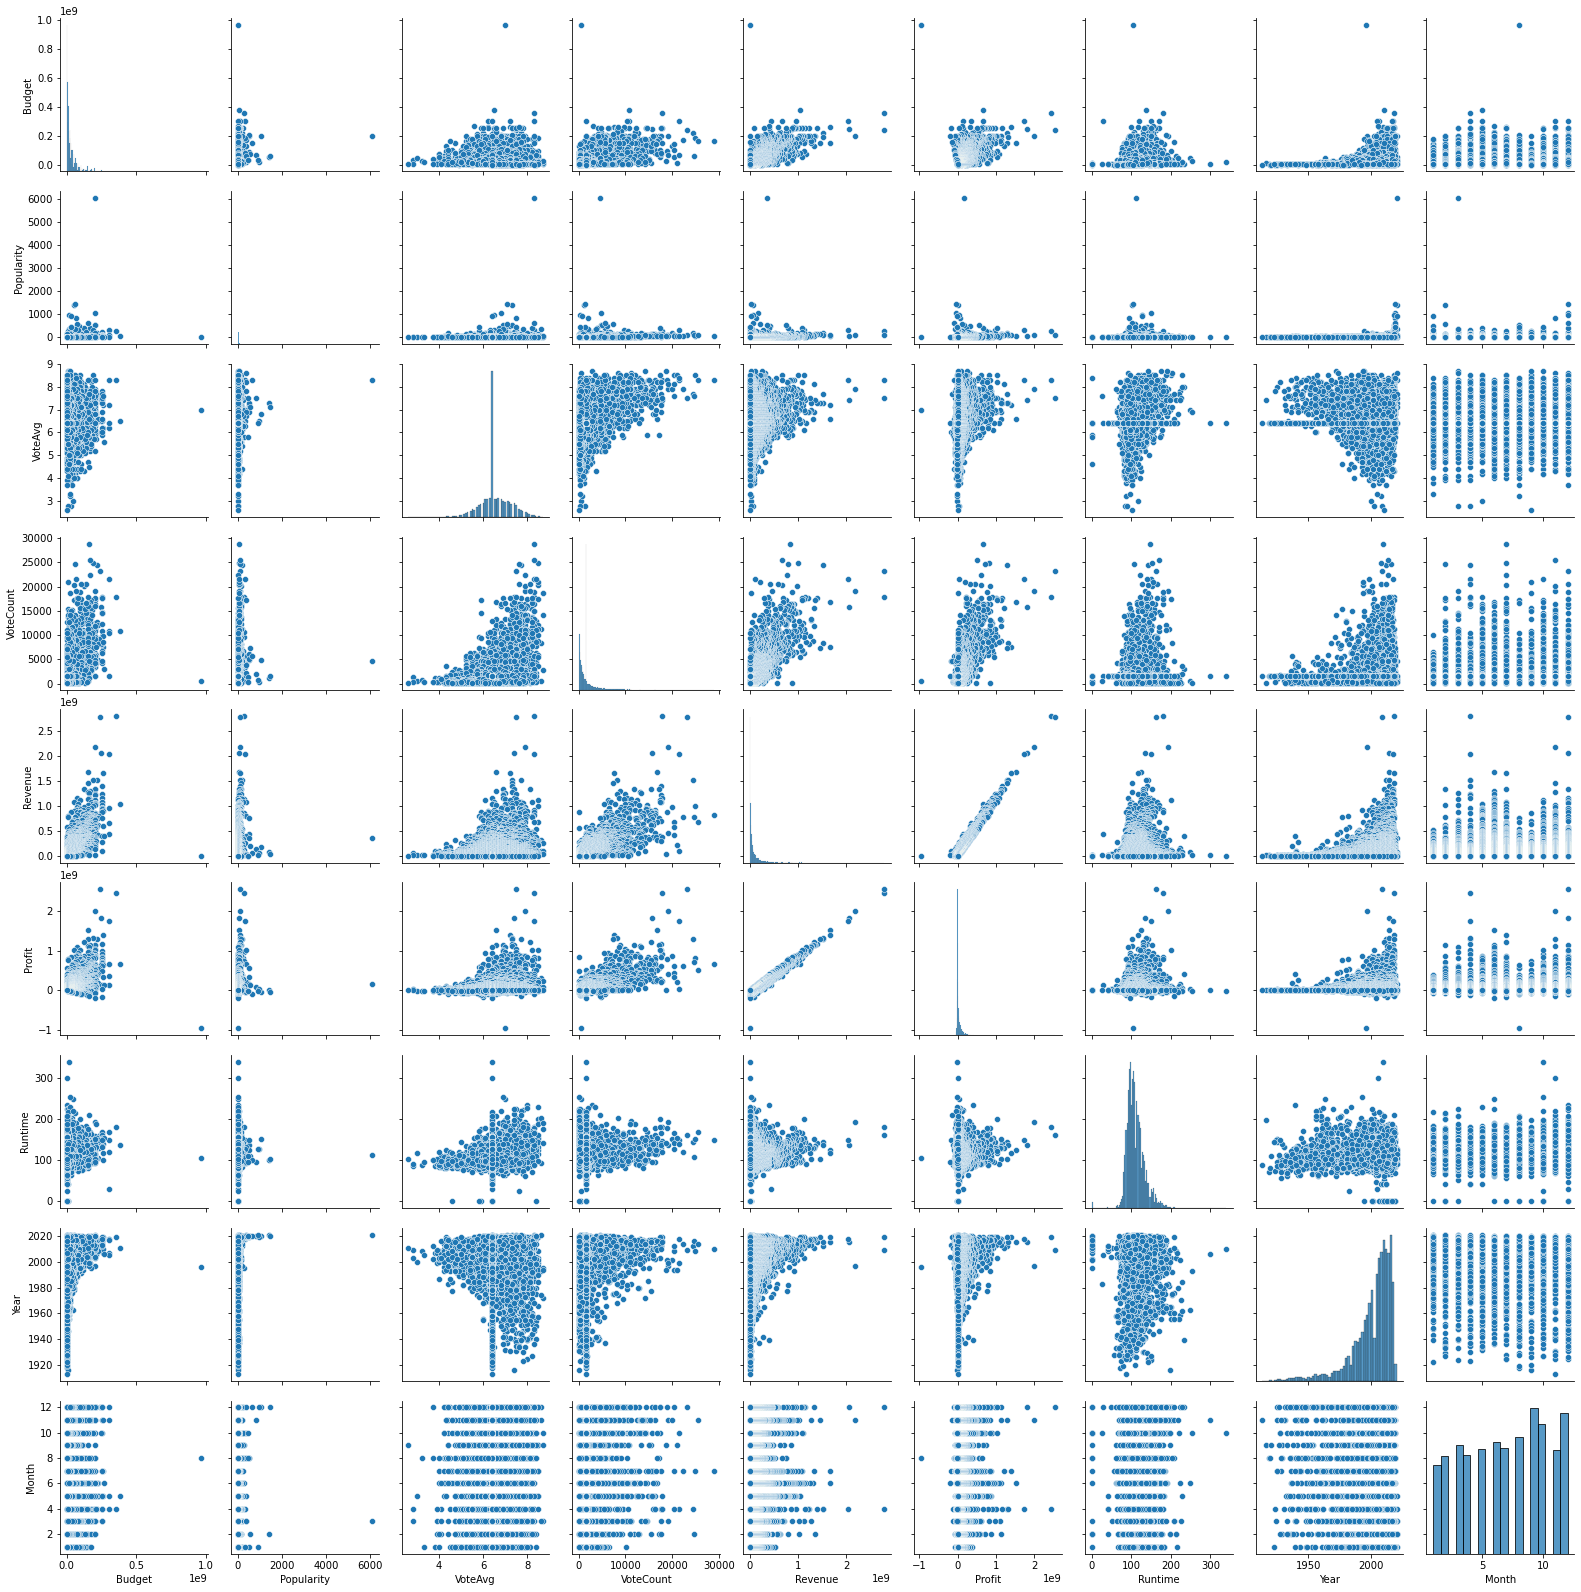

In [13]:
sb.pairplot(data = NumericData)

## Categorical Data

## Month Analysis

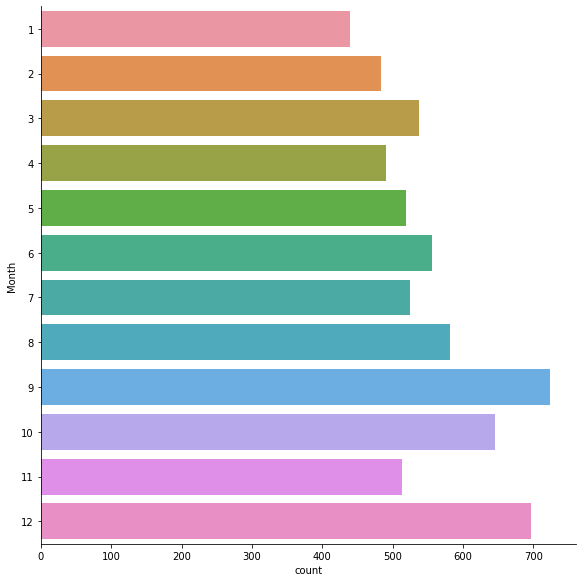

In [177]:
sb.catplot(y = "Month", data = Movie_CleanedData, kind = "count", height = 8)

In [192]:
# Calculate Z-Score for each Genre's mean  [the std dev from mean of profit]
Month = Movie_CleanedData.Month.apply(pd.Series).stack()
Month = pd.get_dummies(Month).groupby(level=0).sum()
Month = Month.replace(0,np.nan)
Month['Profit'] = Movie_CleanedData.Profit
Month['Year'] = Movie_CleanedData.Year

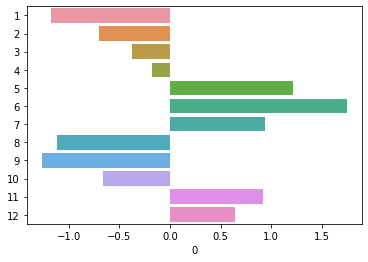

In [193]:
meandf = pd.DataFrame(columns=Month.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for month in Month:
    if month == 'Profit' or month == 'Year':
        continue
    mean = Month.loc[Month[month] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns,orient = "h")

## Genre Analysis

In [207]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

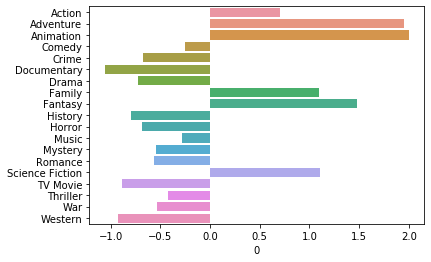

In [208]:
meandf = pd.DataFrame(columns=Genre.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for genre in Genre:
    if genre == 'Profit' or genre == 'Year':
        continue
    mean = Genre.loc[Genre[genre] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns)

In [73]:
Genre2 = Genre.copy()
Genre2 = Genre2.reset_index(drop=True)
for genre in Genre:
    if genre == 'Profit' or genre == 'Year' or genre == 'Index':
        continue
    for i in range(len(Genre)):
        if Genre[genre][i]==1:
            Genre2.at[i,genre] = Genre.Profit[i]
        else:
            continue
Genre2 = Genre2.drop(columns=['Year','Profit'])
# Genre

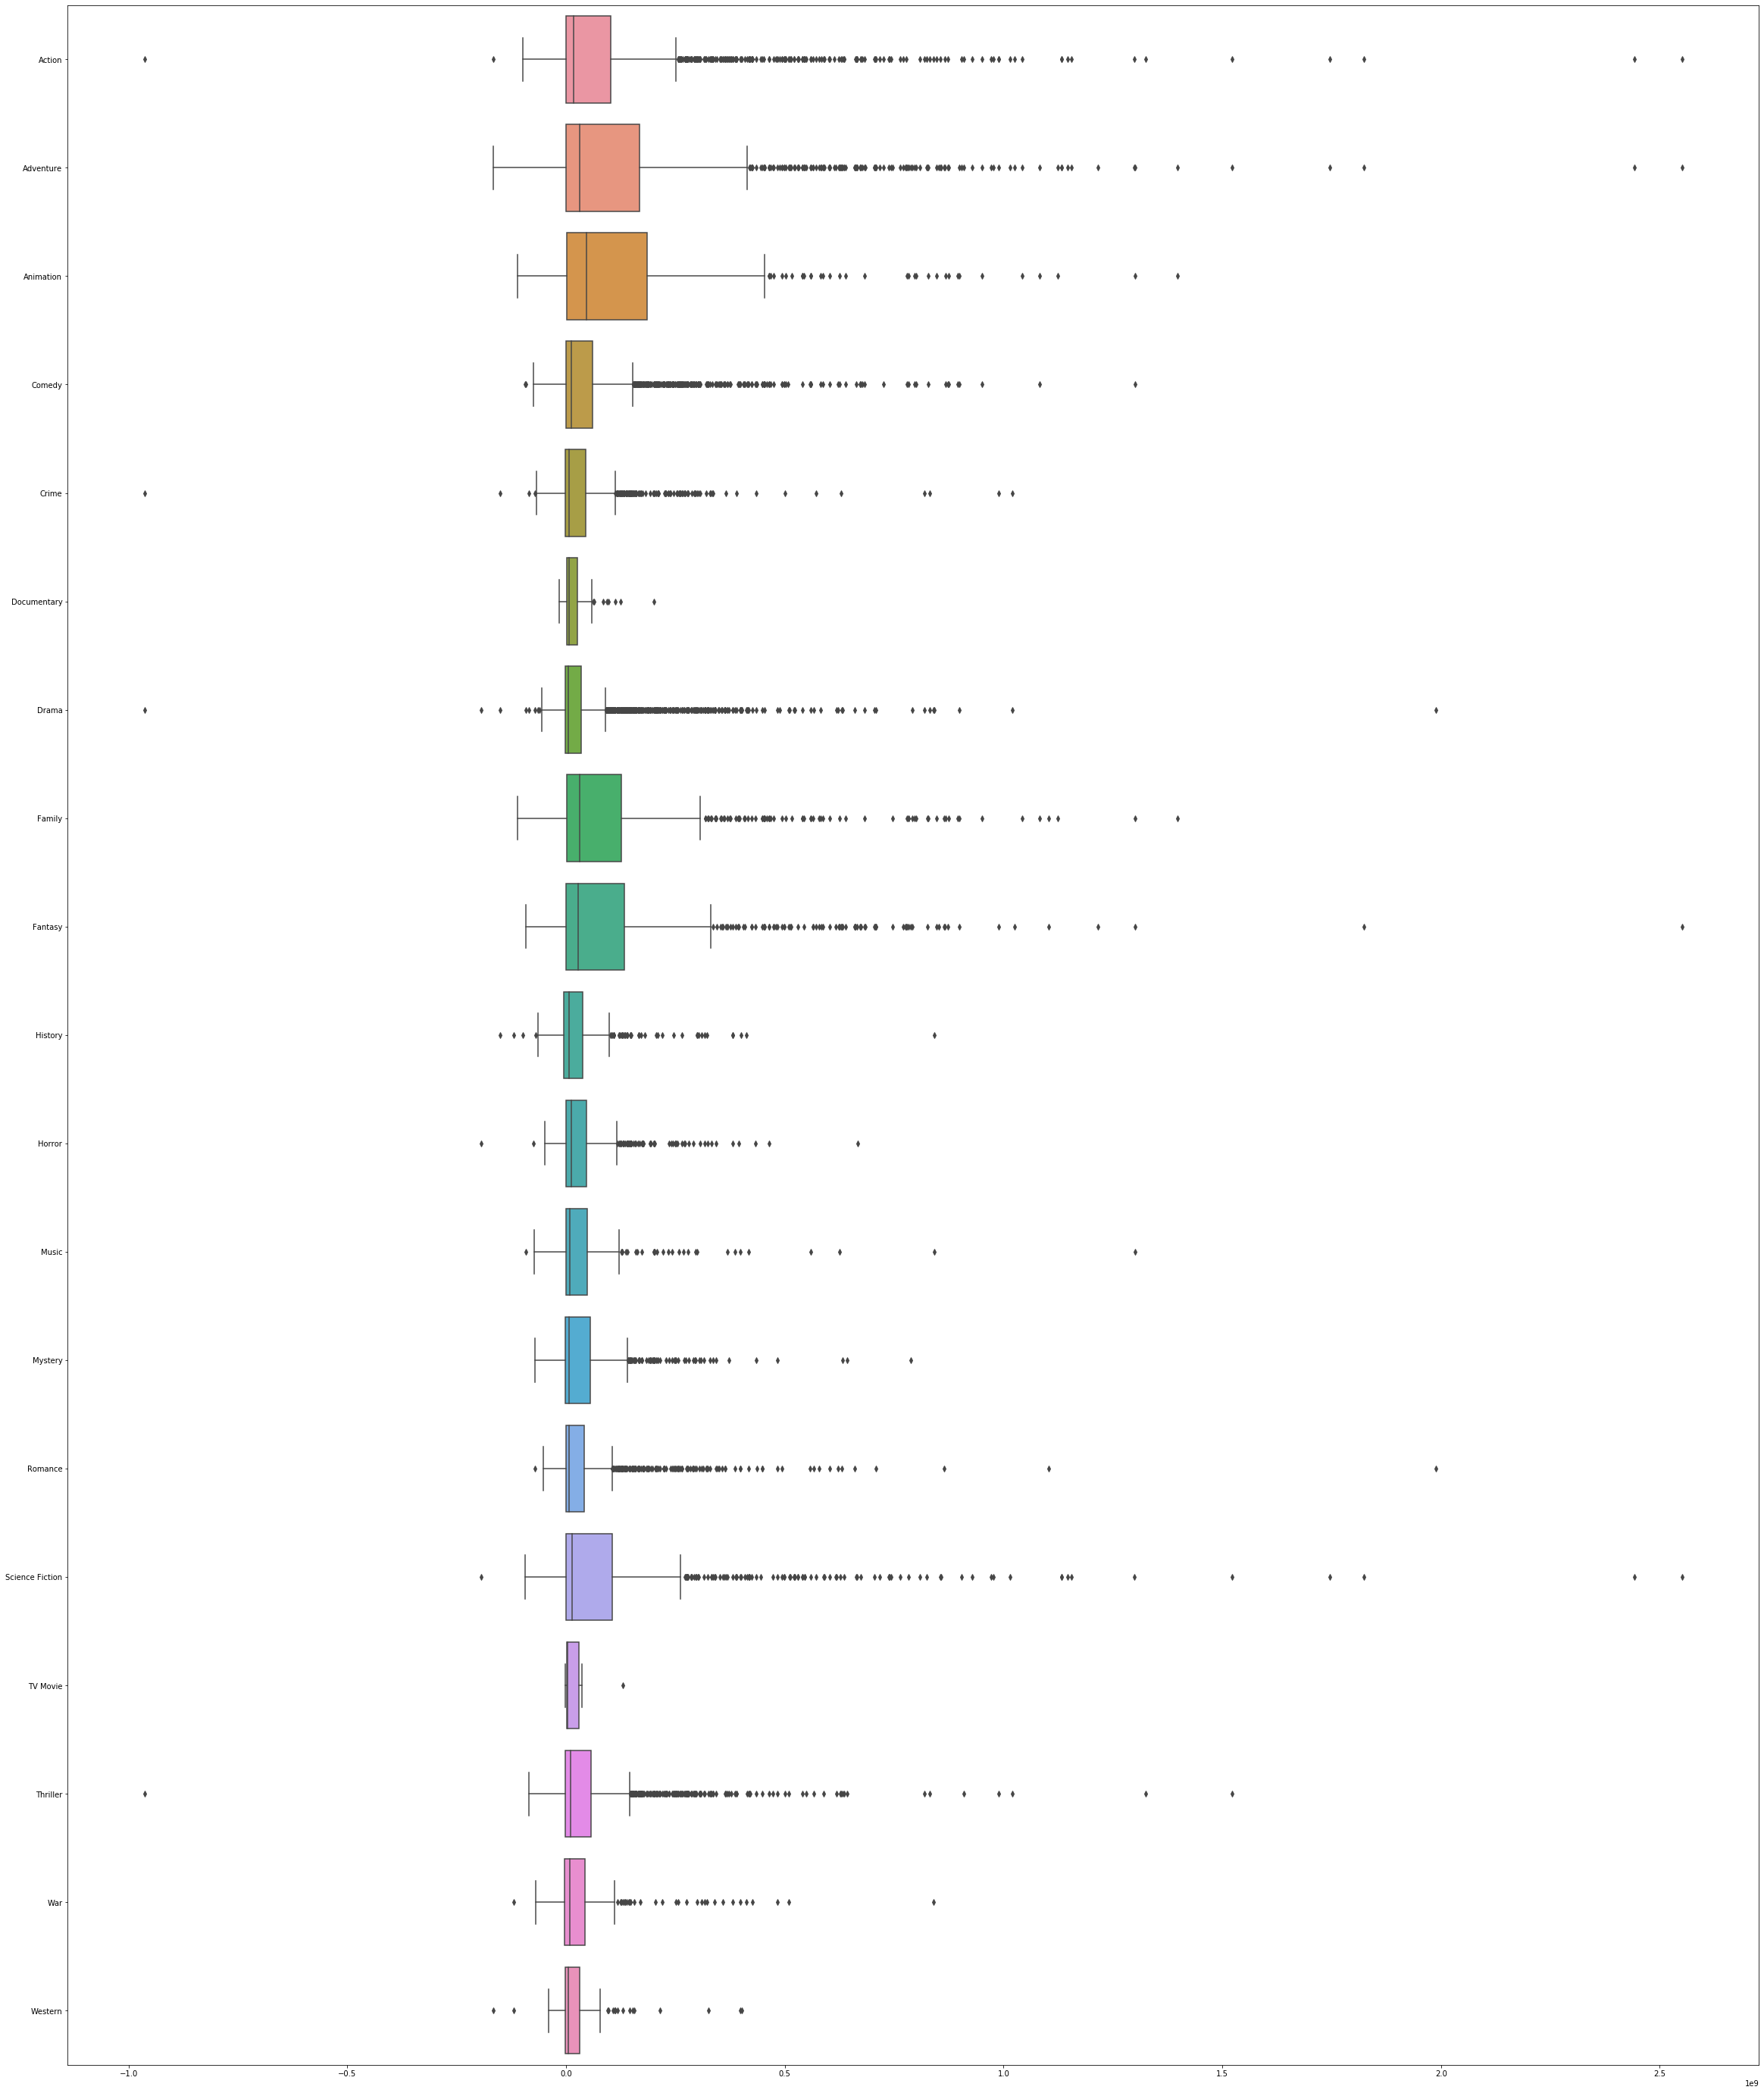

In [80]:
f = plt.figure(figsize=(40, 50))
sb.boxplot(data = Genre2, orient = "h")

In [250]:
df = Genre.melt(id_vars=['Year',"Profit"], var_name="Genre",value_name="Value")
df = df.dropna()
df = pd.DataFrame(df.groupby(["Year","Genre"])["Profit"].mean())
df.reset_index(inplace=True)
df = df.set_index('Year')
df.sort_index(inplace=True)
df= df[df.index>1999] 
df= df[df.index<2020] 
profit = df.reset_index()
profit = profit.set_index('Genre')
less = profit.drop(index = ['Action','Adventure','Animation','Family','Fantasy','Science Fiction'])
profit = profit.drop(index = ['Comedy','Crime','Documentary','Drama','History','Horror','Music','Mystery','Romance','TV Movie','Thriller','War','Western'])


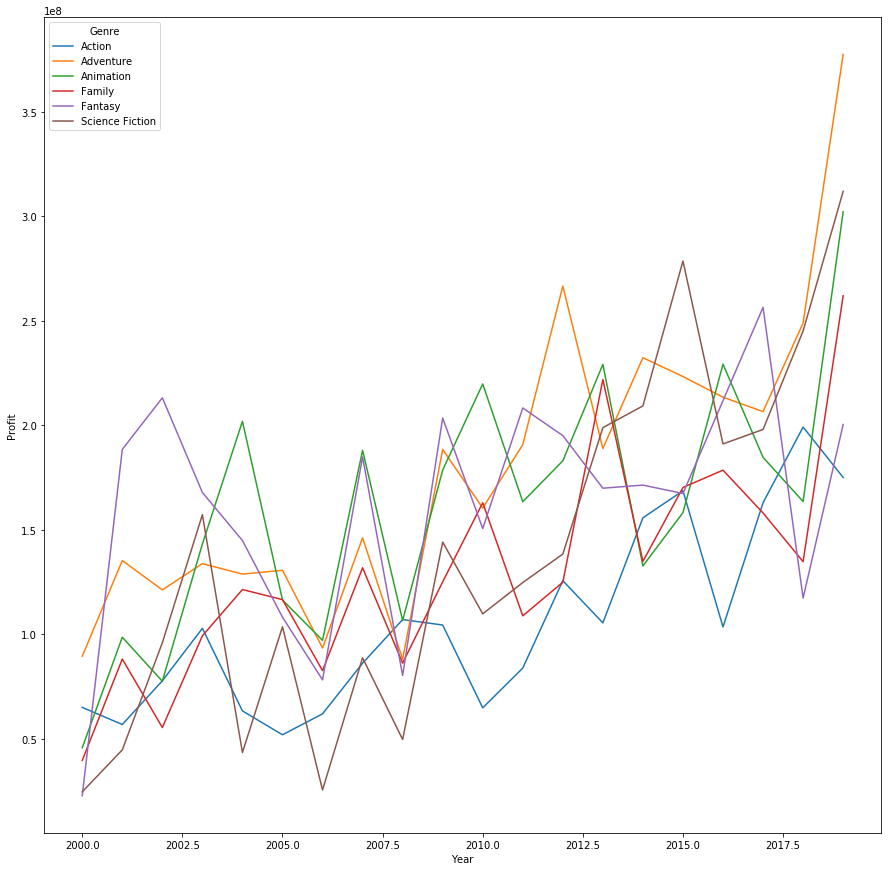

In [251]:
plt.figure(figsize=(15,15))
sb.lineplot(data=profit,x='Year',y='Profit',hue='Genre',ci=None)

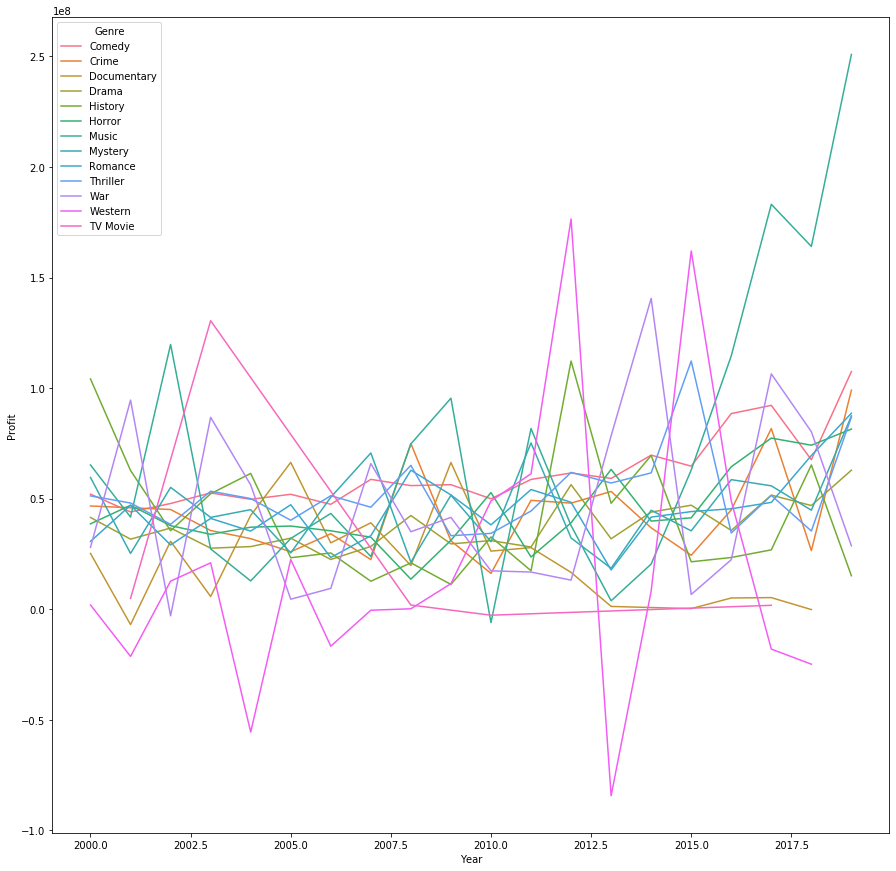

In [252]:
plt.figure(figsize=(15,15))
sb.lineplot(data=less,x='Year',y='Profit',hue='Genre',ci=None)

### For the remaining categories, there are too many different categories to consider directly. There are over 7000 unique companies, 30+ different countries and languages. 

### To deal with this overload of categorical data, we bin the companies into 4 categories based on their movie count frequency. The top 8 Spoken Languages and Production Countries will be extracted for comparison, the rest will be discarded.

In [209]:
ProComDic ={}
ProCounDic = {}
SpoLangDic = {}
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] +=1
    for j in range(len(Movie_CleanedData.ProductionCountry[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCountry[i][j] not in ProCounDic: #if genre is not in dictionary, initialize genre: 1
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] = 1
        elif Movie_CleanedData.ProductionCountry[i][j] in ProCounDic:
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])): #every element in genrelist
        if Movie_CleanedData.SpokenLanguage[i][j] not in SpoLangDic: #if genre is not in dictionary, initialize genre: 1
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] = 1
        elif Movie_CleanedData.SpokenLanguage[i][j] in SpoLangDic:
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] +=1

In [210]:
k = Counter(SpoLangDic)
l = Counter(ProCounDic)
SpoLangDic = k.most_common(8) 
ProCounDic = l.most_common(8)
TopLang = [x[0] for x in SpoLangDic]
TopCoun = [x[0] for x in ProCounDic]

## Production Company Analysis

In [211]:
others = [x[0] for x in ProComDic.items() if x[1]<=20]
small = [x[0] for x in ProComDic.items() if 20<x[1]<=50]
medium = [x[0] for x in ProComDic.items() if 50<x[1]<=150]
large = [x[0] for x in ProComDic.items() if 150<x[1]]        

In [212]:
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in list
        if Movie_CleanedData.ProductionCompany[i][j] in others: 
            Movie_CleanedData.ProductionCompany[i][j] = "Others"
        if Movie_CleanedData.ProductionCompany[i][j] in small: 
            Movie_CleanedData.ProductionCompany[i][j] = "Small"
        if Movie_CleanedData.ProductionCompany[i][j] in medium: 
            Movie_CleanedData.ProductionCompany[i][j] = "Medium"
        if Movie_CleanedData.ProductionCompany[i][j] in large: 
            Movie_CleanedData.ProductionCompany[i][j] = "Large"
            
    for j in range(len(Movie_CleanedData.ProductionCountry[i])):
        if Movie_CleanedData.ProductionCountry[i][j] not in TopCoun:
            Movie_CleanedData.ProductionCountry[i][j] = "Others"
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])):
        if Movie_CleanedData.SpokenLanguage[i][j] not in TopLang:
            Movie_CleanedData.SpokenLanguage[i][j] = "Others"
        

In [213]:
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCom = ProCom.replace(0,np.nan)
ProCom['Profit'] = Movie_CleanedData.Profit
ProCom['Year'] = Movie_CleanedData.Year
ProCom = ProCom.drop(columns=['Others'])

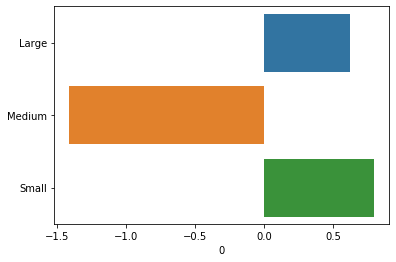

In [248]:
meandf = pd.DataFrame(columns=ProCom.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for com in ProCom:
    if com == 'Profit' or com == 'Year':
        continue
    mean = ProCom.loc[ProCom[com] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns)

In [246]:
Procom2 = ProCom.copy()
Procom2 = Procom2.reset_index(drop=True)
for size in ProCom:
    if size == 'Profit' or size == 'Year' or size == 'Index':
        continue
    for i in range(len(ProCom)):
        if ProCom[size][i]==1:
            Procom2.at[i,size] = ProCom.Profit[i]
        else:
            continue
Procom2 = Procom2.drop(columns=['Year','Profit'])

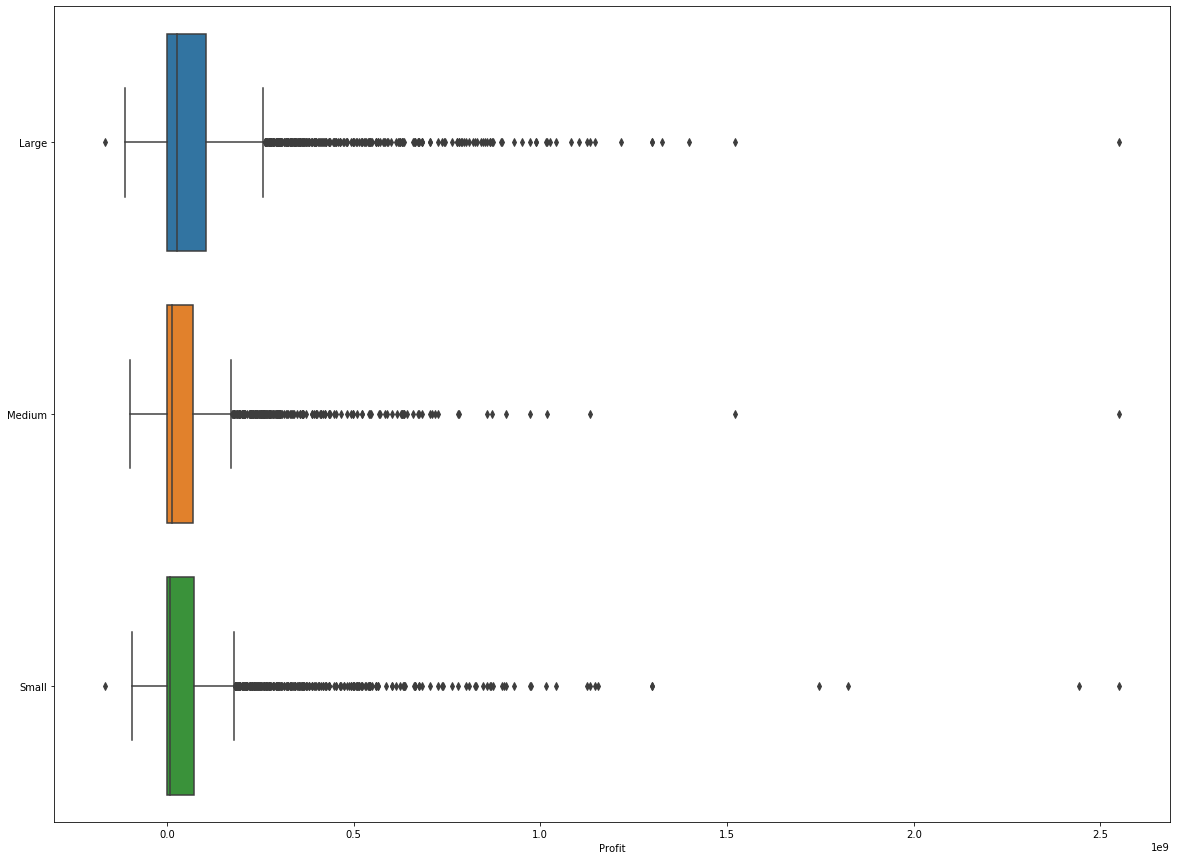

In [222]:
f = plt.figure(figsize=(20, 15))
plt.xlabel('Profit')
sb.boxplot(data = Procom2, orient = "h")

In [226]:
df = ProCom.melt(id_vars=['Year',"Profit"], var_name="ProCom",value_name="Value")
df = df.dropna()
df = pd.DataFrame(df.groupby(["Year","ProCom"])["Profit"].mean())
df.reset_index(inplace=True)
df = df.set_index('Year')
df.sort_index(inplace=True)
df= df[df.index>1999] 
df= df[df.index<2020] 

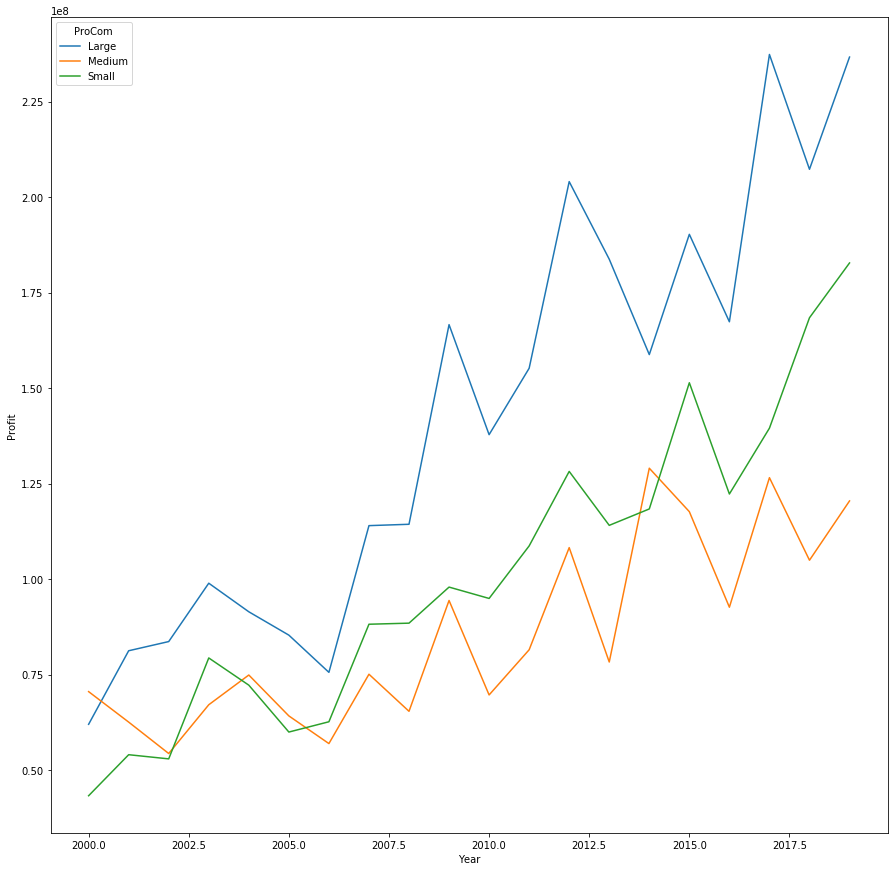

In [227]:
#Describes the avg of all profits from that companysize each year.
plt.figure(figsize=(15,15))
sb.lineplot(data=df,x='Year',y='Profit',hue='ProCom',ci=None)

## Production Country Analysis

In [255]:
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
ProCoun = ProCoun.replace(0,np.nan)
ProCoun['Profit'] = Movie_CleanedData.Profit
ProCoun['Year'] = Movie_CleanedData.Year
ProCoun = ProCoun.drop(columns=['Others'])

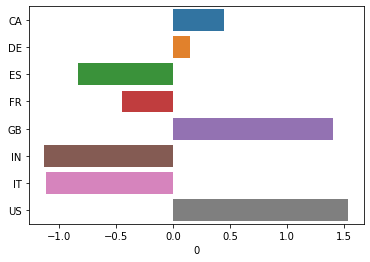

In [249]:
meandf = pd.DataFrame(columns=ProCoun.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for coun in ProCoun:
    if coun == 'Profit' or coun == 'Year':
        continue
    mean = ProCoun.loc[ProCoun[coun] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns)

In [241]:
ProCoun2 = ProCoun.copy()
ProCoun2 = ProCoun2.reset_index(drop=True)
for country in ProCoun:
    if country == 'Profit' or country == 'Year' or country == 'Index':
        continue
    for i in range(len(ProCom)):
        if ProCoun[country][i]==1:
            ProCoun2.at[i,country] = ProCoun.Profit[i]
        else:
            continue
ProCoun2 = ProCoun2.drop(columns=['Year','Profit'])

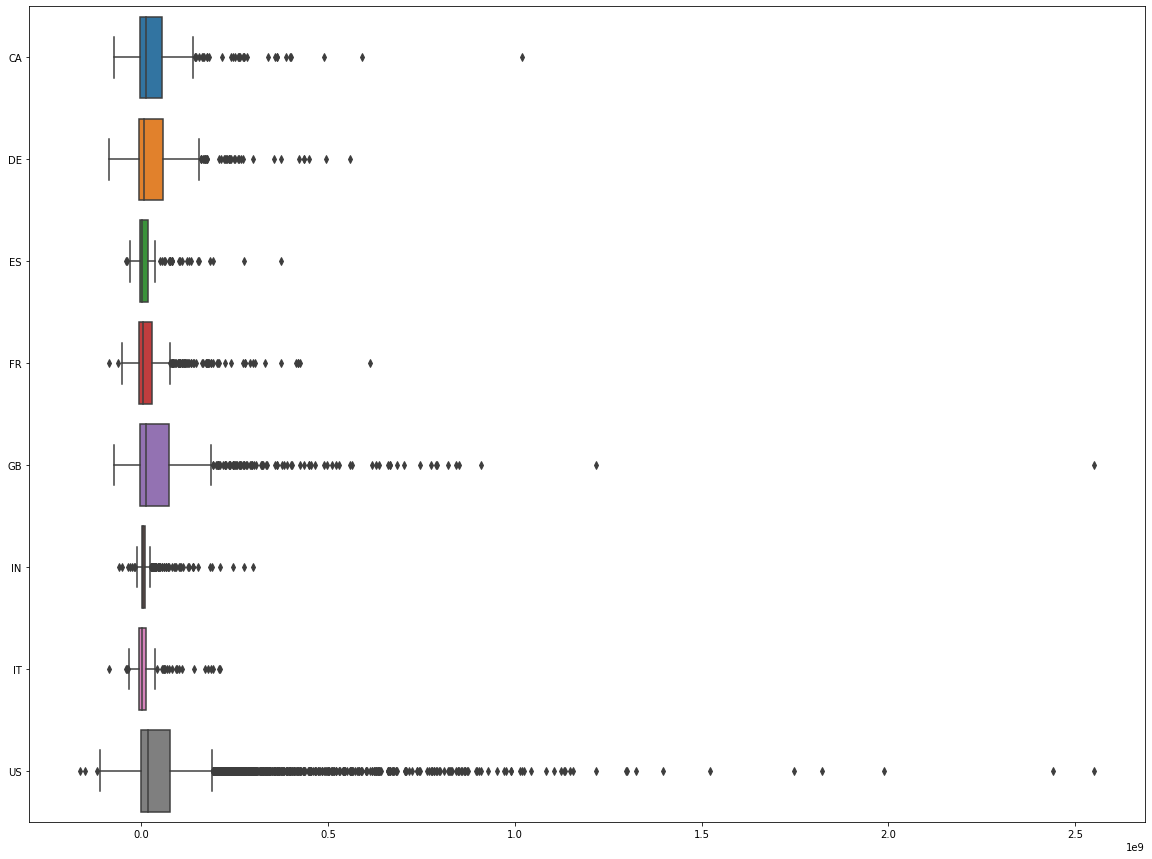

In [245]:
f = plt.figure(figsize=(20, 15))
sb.boxplot(data = ProCoun2, orient = "h")

In [253]:
df = ProCoun.melt(id_vars=['Year',"Profit"], var_name="ProCoun",value_name="Value")
df = df.dropna()
df = pd.DataFrame(df.groupby(["Year","ProCoun"])["Profit"].mean())
df.reset_index(inplace=True)
df = df.set_index('Year')
df.sort_index(inplace=True)
df= df[df.index>1999] 
df= df[df.index<2020] 

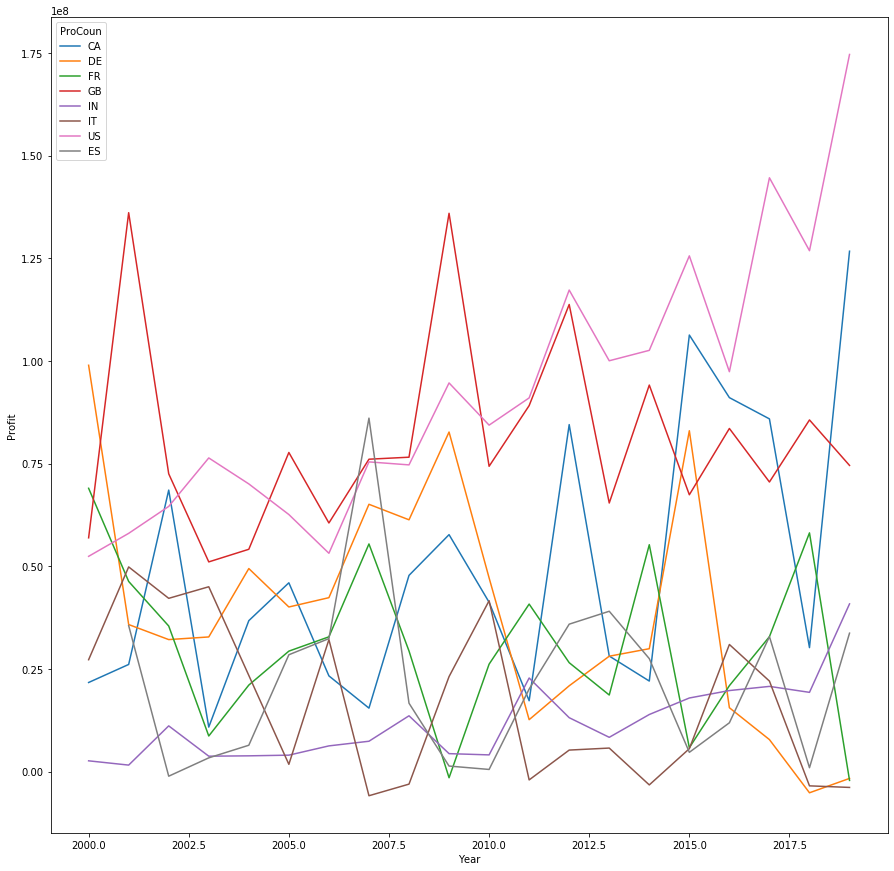

In [254]:
#Describes the avg of all profits from that companysize each year.
plt.figure(figsize=(15,15))
sb.lineplot(data=df,x='Year',y='Profit',hue='ProCoun',ci=None)

## Spoken Language Analysis

In [257]:
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
SpoLang = SpoLang.replace(0,np.nan)
SpoLang['Profit'] = Movie_CleanedData.Profit
SpoLang['Year'] = Movie_CleanedData.Year
SpoLang = SpoLang.drop(columns=['Others'])
SpoLang.head()

,de,en,es,fr,hi,it,ja,ru,Profit,Year
Movie_name,,,,,,,,,,
#살아있다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7116285,2020
'71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-7800000,2014
'N Beetje Verliefd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166214,2006
(500) Days of Summer,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,53222734,2009
(T)Raumschiff Surprise - Periode 1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67341401,2004


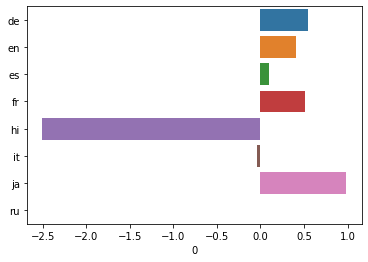

In [258]:
meandf = pd.DataFrame(columns=SpoLang.columns.tolist())
meandf = meandf.drop(columns=['Year','Profit'])

means  = []
for lang in SpoLang:
    if lang == 'Profit' or lang == 'Year':
        continue
    mean = SpoLang.loc[SpoLang[lang] == 1].Profit.mean()
    means.append(mean)

meandf.loc[0] = stats.zscore(means)

ax = sb.barplot(x=meandf.loc[0],y=meandf.columns)

In [262]:
SpoLang2 = SpoLang.copy()
SpoLang2 = SpoLang2.reset_index(drop=True)
for country in SpoLang:
    if country == 'Profit' or country == 'Year' or country == 'Index':
        continue
    for i in range(len(SpoLang)):
        if SpoLang[country][i]==1:
            SpoLang2.at[i,country] = SpoLang.Profit[i]
        else:
            continue
SpoLang2 = SpoLang2.drop(columns=['Year','Profit'])

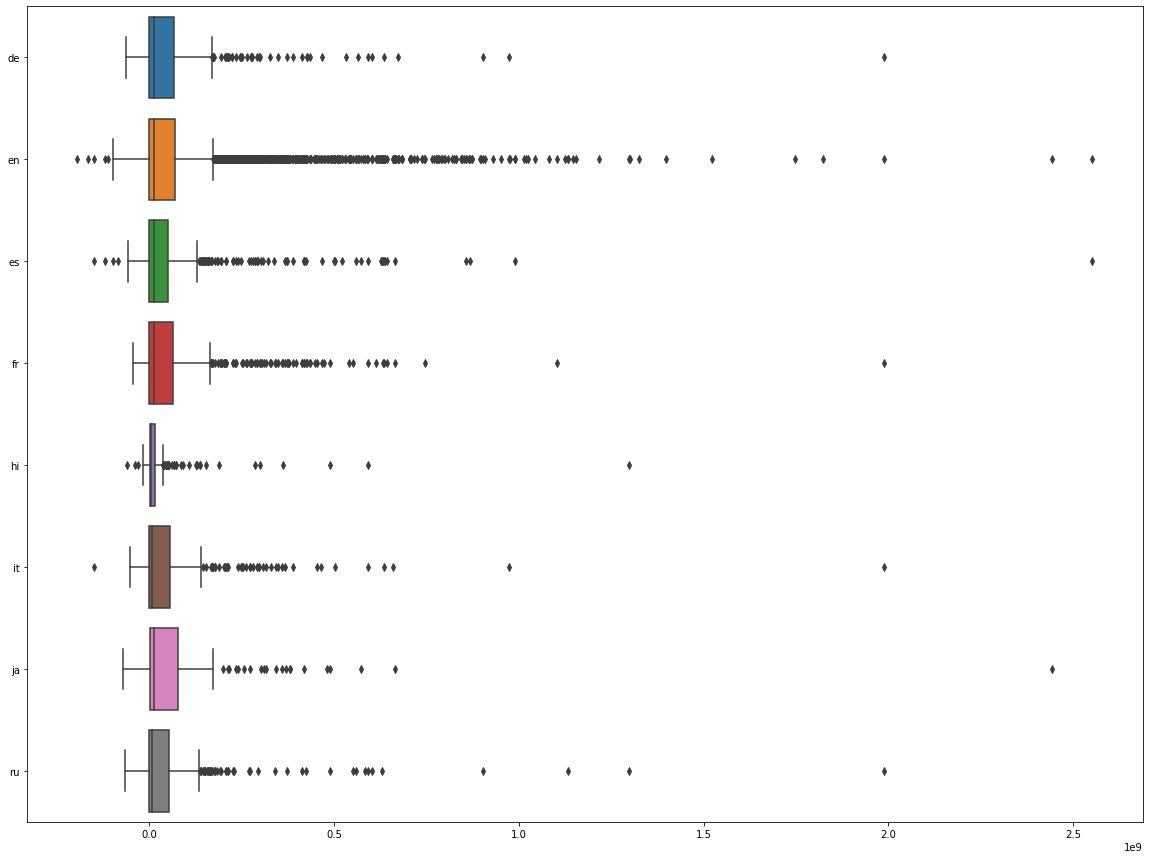

In [263]:
f = plt.figure(figsize=(20, 15))
sb.boxplot(data = SpoLang2, orient = "h")

In [264]:
df = SpoLang.melt(id_vars=['Year',"Profit"], var_name="SpoLang",value_name="Value")
df = df.dropna()
df = pd.DataFrame(df.groupby(["Year","SpoLang"])["Profit"].mean())
df.reset_index(inplace=True)
df = df.set_index('Year')
df.sort_index(inplace=True)
df= df[df.index>1999] 
df= df[df.index<2020] 

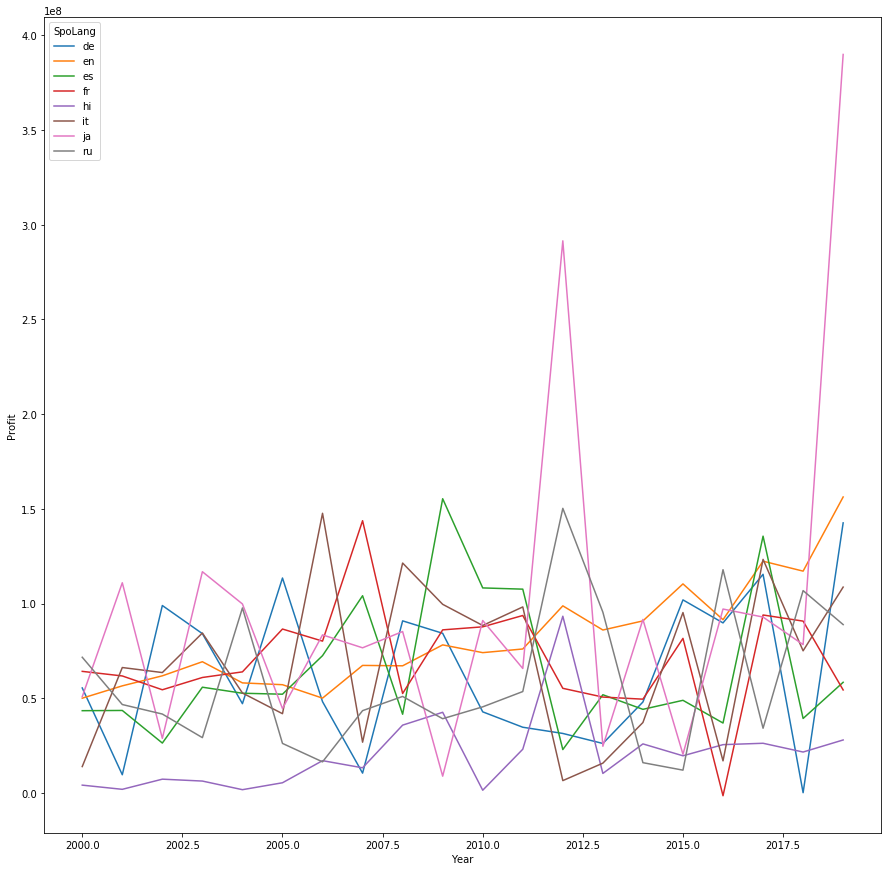

In [265]:
#Describes the avg of all profits from that companysize each year.
plt.figure(figsize=(15,15))
sb.lineplot(data=df,x='Year',y='Profit',hue='SpoLang',ci=None)

# Linear Regression on Numeric Data

Response Variable : Profit
    
Predictor Variables : Budget, Popularity, VoteAvg, VoteCount, Revenue, Runtime, Year, Month

In [38]:
# Year, Month

Regression Model :  Total =  𝑎1xBudget + a2xPopularity + a3xVoteAvg + a4xVoteCount + a5xRevenue + a6xRuntime + b 

In [39]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
# Extract Response and Predictors
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = pd.DataFrame(Movie_CleanedData[['Budget', 'Popularity', 'VoteAvg', 'VoteCount', 'Revenue', 'Runtime', 'Year','Month']])

In [41]:
# Splitting the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, Blue Story to ಧೀರ ರಣ ವಿಕ್ರಮ
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Budget      5034 non-null   int64  
 1   Popularity  5034 non-null   float64
 2   VoteAvg     5034 non-null   float64
 3   VoteCount   5034 non-null   int64  
 4   Revenue     5034 non-null   int64  
 5   Runtime     5034 non-null   float64
 6   Year        5034 non-null   int64  
 7   Month       5034 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 354.0+ KB


In [43]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [44]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [1.93715096e-07]
Coefficients of Regression 	: a =  [[-1.00000000e+00  3.49582359e-10  5.96741238e-09  3.16209698e-11
   1.00000000e+00 -2.81838351e-12 -1.21917441e-10  3.21983193e-10]]


In [45]:
#Printing coefficients against predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

   Predictors  Coefficients
0      Budget -1.000000e+00
1  Popularity  3.495824e-10
2     VoteAvg  5.967412e-09
3   VoteCount  3.162097e-11
4     Revenue  1.000000e+00
5     Runtime -2.818384e-12
6        Year -1.219174e-10
7       Month  3.219832e-10



In [46]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

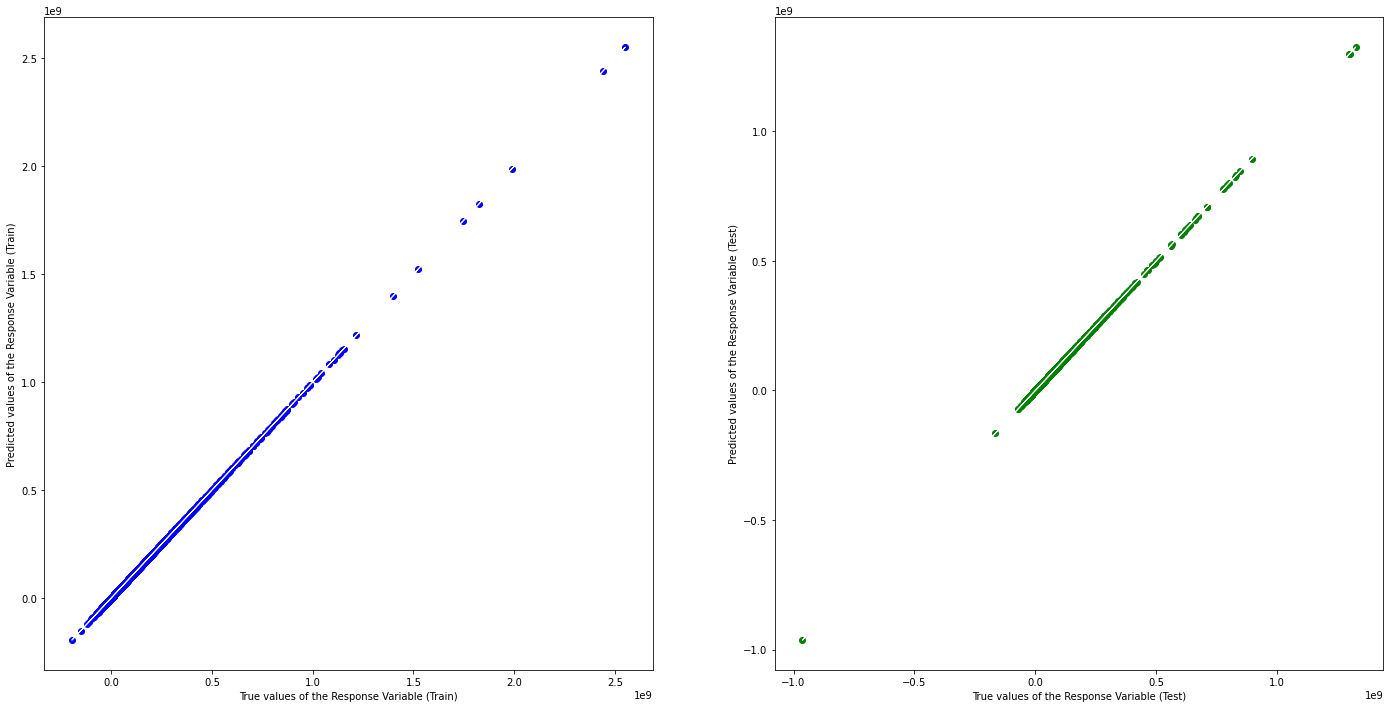

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 7.40075055830392e-15

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 5.672916698759442e-15




In [47]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

print()

## Preparing Categorical Data for Random Forest

In [48]:
Genre = Movie_CleanedData.GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
ProCom = ProCom.drop(columns=['Others'])
ProCoun = ProCoun.drop(columns=['Others'])
SpoLang = SpoLang.drop(columns=['Others'])
Movie_CleanedData = Movie_CleanedData.drop(columns=['Overview','Tagline','ReleaseDate','OriginalLanguage'])
Movie_CleanedData =pd.concat([Movie_CleanedData, Genre], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCom], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, SpoLang], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCoun], axis=1)
Movie_CleanedData = Movie_CleanedData.drop(columns=['GenreList','ProductionCompany','ProductionCountry','SpokenLanguage'])
Movie_CleanedData = Movie_CleanedData.rename(columns={"de":"Deutschland ","en": "English","es": "Spanish","fr":"French ","hi":"Hindi","it":"Italian","ja":"Japanese","ru":"Russian ","CA":"Canada","DE":"Germany","ES":"Spain","FR":"France","GB":"Britain","IN":"India","IT":"Italy","US":"America"})
Movie_CleanedData['Adult'] = Movie_CleanedData['Adult'].astype(int)
Movie_CleanedData = Movie_CleanedData.drop(columns=["Revenue","Budget"])
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6712 entries, Avengers: Endgame to Bacalaureat
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adult            6712 non-null   int64  
 1   Popularity       6712 non-null   float64
 2   VoteAvg          6712 non-null   float64
 3   VoteCount        6712 non-null   int64  
 4   Profit           6712 non-null   int64  
 5   Runtime          6712 non-null   float64
 6   Year             6712 non-null   int64  
 7   Month            6712 non-null   int64  
 8   Action           6712 non-null   uint8  
 9   Adventure        6712 non-null   uint8  
 10  Animation        6712 non-null   uint8  
 11  Comedy           6712 non-null   uint8  
 12  Crime            6712 non-null   uint8  
 13  Documentary      6712 non-null   uint8  
 14  Drama            6712 non-null   uint8  
 15  Family           6712 non-null   uint8  
 16  Fantasy          6712 non-null   uint8  
 

In [49]:
from sklearn.preprocessing import StandardScaler
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = Movie_CleanedData.drop(columns=['Profit'])

In [50]:
y.head()

,Profit
Avengers: Endgame,2441800564
Avatar,2550965087
Titanic,1987463944
Star Wars: The Force Awakens,1823223624
Avengers: Infinity War,1746239637


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
y_train.values.ravel()

array([ 42084830, -26819326,  -6379071, ...,  80258000, -14000000,
        25105542])

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=200, random_state=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train.values.ravel())  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [57]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
y_pred
df=pd.DataFrame({'Actual':y_test.Profit, 'Predicted':y_pred})
df.head()

,Actual,Predicted
The Notebook,86603229,-15581387
La Vérité si je mens !,25456000,-3765639
The International,10161391,19498846
The House Across the Bay,-29591,225671
Josh and S.A.M.,-16471837,-17702507


In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0014892032762472078


Feature ranking:
1. Feature 1 (0.134141)
2. Feature 4 (0.125564)
3. Feature 3 (0.104311)
4. Feature 5 (0.097027)
5. Feature 6 (0.081475)
6. Feature 2 (0.075766)
7. Feature 13 (0.046691)
8. Feature 26 (0.037394)
9. Feature 10 (0.036698)
10. Feature 23 (0.027012)
11. Feature 28 (0.024799)
12. Feature 7 (0.020985)
13. Feature 27 (0.020121)
14. Feature 20 (0.017900)
15. Feature 44 (0.017382)
16. Feature 8 (0.016204)
17. Feature 11 (0.012864)
18. Feature 21 (0.011378)
19. Feature 30 (0.010749)
20. Feature 15 (0.007594)
21. Feature 14 (0.007163)
22. Feature 17 (0.006429)
23. Feature 41 (0.006260)
24. Feature 31 (0.005281)
25. Feature 32 (0.005043)
26. Feature 42 (0.004607)
27. Feature 19 (0.004594)
28. Feature 40 (0.003962)
29. Feature 9 (0.003286)
30. Feature 16 (0.003181)
31. Feature 38 (0.003130)
32. Feature 36 (0.002945)
33. Feature 33 (0.002871)
34. Feature 37 (0.002624)
35. Feature 29 (0.002603)
36. Feature 34 (0.002252)
37. Feature 18 (0.001725)
38. Feature 24 (0.001693)
39. Feature 3

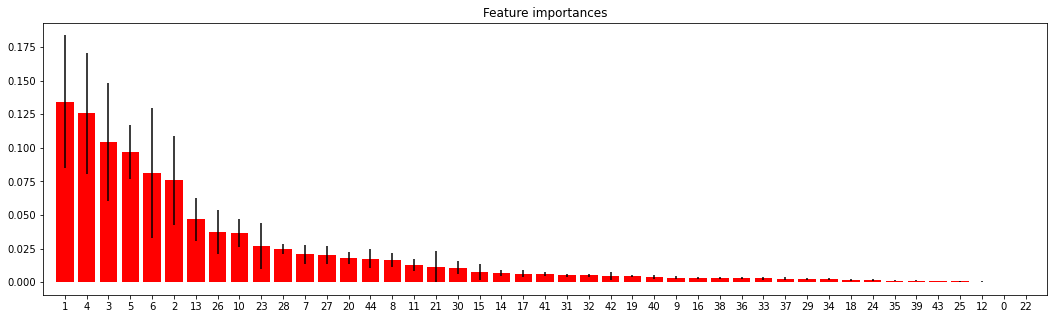

In [65]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
f, ax = plt.subplots(figsize=(18,5))
#plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


From the above data, we can see that Feature 2 i.e. Popularity and Feature 5 i.e Revenue are informative.

They will hence help us predict Profit.

In [73]:
y = pd.DataFrame(Movie_CleanedData.Profit)
X = pd.DataFrame(data = Movie_CleanedData[["Popularity"]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [83]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
y_train.values.ravel()
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=200, random_state=0)

In [85]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train.values.ravel())  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [86]:
y_pred= classifier.predict(X_test)  
y_pred

array([  7793200,    738015,    902679, ...,  26000000, -13651111,
       -12946185])

In [87]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [81]:
# Plot the actual values
plt.plot(df.Predicted, 'b-', label = 'actual')

# Plot the predicted values
plt.plot(df.Predicted, 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel(Profit); plt.ylabel(Popularity); 

plt.title('Actual and Predicted Values');


NameError: name 'Popularity' is not defined

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaco

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2742 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2765 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaco

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anac

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3122 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3095 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaco

/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3093 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anamikakolady/opt/an

ValueError: Image size of 375798x633 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

# Determining Performance Metrics

In [ ]:
y_pred = regressor.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualizing a Single Decision Tree